<a href="https://colab.research.google.com/github/italomarcelogit/python.free/blob/master/NLP_NLTK_BASIC_Get_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests



In [2]:
!pip install feedparser

     |████████████████████████████████| 81kB 4.9MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp36-none-any.whl size=6067 sha256=7614ab0b3e4e459fb3fb29fa18949e8a2056e7a17e66dba4981a5932b533a39b
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370adb944506a
Successfully built sgmllib3k


In [3]:
import feedparser

In [4]:
rssurl = 'https://news.google.com/rss/search?q=apple'
news = feedparser.parse(rssurl)

In [5]:
df=pd.json_normalize(news.entries)

In [6]:
df.isnull().sum()

title                        0
links                        0
link                         0
id                           0
guidislink                   0
published                    0
published_parsed             0
summary                      0
title_detail.type            0
title_detail.language      100
title_detail.base            0
title_detail.value           0
summary_detail.type          0
summary_detail.language    100
summary_detail.base          0
summary_detail.value         0
source.href                  0
source.title                 0
dtype: int64

In [7]:
df.link.head()

0    https://www.macrumors.com/2020/10/01/apple-q4-...
1    https://www.apple.com/newsroom/2020/09/apple-b...
2    https://www.macrumors.com/2020/09/30/apple-wat...
3    https://9to5mac.com/2020/10/01/apple-catches-e...
4    https://www.macrumors.com/2020/10/01/apple-pul...
Name: link, dtype: object

In [8]:
df.link[3]

'https://9to5mac.com/2020/10/01/apple-catches-electronics-recycler-illegally-reselling-over-100000-iphones-ipads-apple-watches/'

In [9]:
from bs4 import BeautifulSoup

In [10]:
article = requests.get(df.link[3])

In [11]:
articles = BeautifulSoup(article.content, 'lxml')
# article_body = articles.findAll('body')
# pagecopy = articles.findAll(class_="pagebody-copy")
# for EachPart in articles.select('div[class*="message-cell "]'):
#     print(EachPart)

In [12]:

pagecopy = articles.find_all('p')
rows = []
for pc in pagecopy:
  row=''
  for txt in pc.strings:
    row += txt
  rows.append(row)

In [13]:
from textblob import TextBlob
import nltk

# update textblob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# setup cores
colors = ['PowderBlue', 'Tomato', 'MidnightBlue', 'Goldenrod', 'MediumOrchid',
          'Salmon', 'Lime', 'PapayaWhip', 'DeepSkyBlue', 'LightPink']

# setup estrutura de graficos
# pie
explode = (0.01, 0.01)
labels = ['Positivo', 'Negativo']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
pos = 0
neg = 0
for r in rows:
  txt = TextBlob(r)
  polarity = txt.sentiment.polarity
  if polarity != 0:
    if polarity > 0:
        pos += 1
    else:
        neg += 1

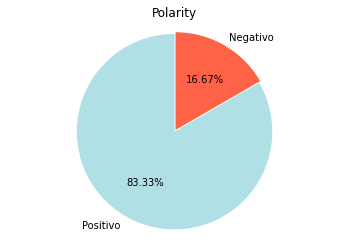

In [15]:
import matplotlib.pyplot as plt

plt.pie([pos, neg], labels=labels, colors=colors, startangle=90, explode = explode, autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Polarity')
plt.show()